# DATA INGESTION AND WRANGLING


## 1) Formats chosen: 

* .jpg/.jpeg
* .mp4
* .xlsx
* .json
* .csv


## 2) Python functions for loading data in different formats 

### 2.1) def load_jpeg_image()

In [6]:
from PIL import Image
from IPython.display import display

def load_jpeg_image(file_path):

    image = Image.open(file_path)

    #display(image)
    return image

# Example usage:
image = load_jpeg_image('C:/Users/acm11/Pictures/Mønster-prøve.jpg')

# This opens the image in a (the computers default?) application for showing images:
#image.show()



### 2.2) def load_mp4_video()

In [9]:
import cv2
import time
import matplotlib.pyplot as plt

def load_mp4_video(file_path):

    # Creating a VideoCapture object (which create a way) to read video(frames) from file
    video = cv2.VideoCapture(file_path)

    # Initializing a variable with a list for video frames
    frames = []

    # Timin how long it takes to load the frames
    start_time = time.time()
    
    print("Starting to load frames...")
    

    while True:
        # video.read() reads the next frame in the video and updates which frames has been read in the video(VideoCapture) object
        # video.read() returns a 1) boolean value indicating if the frame has been read succesfully and 2) a frame
        fr_read_succes, frame = video.read()
        
        if not fr_read_succes:
            break
            
        frames.append(frame)

    # Stop timing
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Closing the file that the video object was associated with/stops capturing video from a live camera or other live video source
    video.release()

    
    print(f"Frames loaded: {len(frames)}")
    print(f"Total time taken: {elapsed_time:.2f} seconds")
    
    return frames


frames = load_mp4_video('C:/Users/acm11/Videos/SodaVideo.mp4')
    

Starting to load frames...
Frames loaded: 329
Total time taken: 8.85 seconds


### 2.3) def load_excel_file()

In [11]:
import pandas as pd

def load_excel_file(file_path, headerChosen):
    df = pd.read_excel(file_path, header=headerChosen)
    return df

# Example usage
excel_data1 = load_excel_file('C:/Users/acm11/OneDrive/Dokumenter/test_excel_familien.xlsx', 0)
excel_data2 = load_excel_file('C:/Users/acm11/OneDrive/Dokumenter/test_excel_familien.xlsx', 1)

print(excel_data1)
#print(excel_data2)

   id    name  age                                        random_info
0  ID    NAME  AGE                                        RANDOM_INFO
1   1  Tobias   34  Can only ride without hands on one bike in the...
2   2   Jonas   31                           Is the best fisher in NV
3   3   Lykke   63                                 Is a great teacher
4   4    Finn   63                               Is a great guitarist


In [12]:
first_frame_rgb = cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB)

#plt.imshow(first_frame_rgb)
#plt.title("RGB Image of first frame in soda video")
#plt.axis("off")
#plt.show()


first_frame_image = Image.fromarray(first_frame_rgb)

# Displays the image in another application
#first_frame_image.show(title='First Frame')

# cv2.destroyAllWindows()

# Displaying the image as an array
#display(first_frame_rgb)

### 2.4) def load_json_file()

In [14]:
import json

def load_json_file(file_path):

    with open(file_path, 'r') as file:
        data = json.load(file)

    df = pd.DataFrame(data)

    # Assuming the last column is the target
    data_2d = df.iloc[:, :-1].to_numpy()  # Convert all but the last column to a 2D NumPy array
    target_1d = df.iloc[:, -1].to_numpy()  # Convert the last column to a 1D NumPy array

    return df, data_2d, target_1d
    


### 2.5) def load_csv_file()

In [16]:
def load_csv_file(file_path):

    df = pd.read_csv(file_path, header=0)

    return df

#df = load_csv_file("C:/User/SomeDirectory/SomeFile.json")

## 3) Using some of my functions to create Data Frames

* 3.1) XLS -> Data Frame
* 3.2) JSON -> Data Frame
* 3.3) CSV -> Data Frame

### 3.1) XLS -> Data Frame


In [20]:
uspres_df = load_excel_file("C:/Users/acm11/BusinessIntelligencedat4/US_Presidents.xlsx", 0)

### 3.2) JSON -> Data Frame

In [22]:
iris_df, iris_2d, iris_1d = load_json_file("C:/Users/acm11/BusinessIntelligencedat4/iris.json")

### 3.3) CSV -> Data Frame

In [24]:
alcohol_df = load_csv_file("C:/Users/acm11/BusinessIntelligencedat4/Alcohol_effect_on_students.csv")

## 4) Exploration and cleaning of data

### 4.1) Exploring

#### 4.1.1) Eploring US Presidents

##### 4.1.1.1) The 5 first rows: .head()

In [29]:
uspres_df.head()

,Unnamed: 0,S.No.,president,prior,party,vice,salary,date updated,date created
0,0,1,George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan,John Adams,5000,2021-07-14,2012-03-04
1,1,2,john adams,1st Vice President of the United States,Federalist,Thomas Jefferson,10000,2021-07-14,2012-03-04
2,2,3,Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr,15000,2021-07-14,2012-03-04
3,3,4,James Madison,5th United States Secretary of State (1801â...,Democratic- Republican,George Clinton,20000,2021-07-14,2012-03-04
4,4,5,JAMES MONROE,7th United States Secretary of State (1811â...,Democratic- Republican,Daniel D. Tompkins,25000,2021-07-14,2012-03-04


##### 4.1.1.2) Data types: .dtypes

In [31]:
dtypes_series = uspres_df.dtypes
dtypes_df = pd.DataFrame([dtypes_series.index, dtypes_series.values], index=['Column Name', 'Data Type'])
dtypes_df

,0,1,2,3,4,5,6,7,8
Column Name,Unnamed: 0,S.No.,president,prior,party,vice,salary,date updated,date created
Data Type,int64,int64,object,object,object,object,int64,datetime64[ns],datetime64[ns]


##### 4.1.1.3) All missing values (NA or NaN): .isna().sum()

In [34]:
na_values = uspres_df.isna().sum()
type(na_values)

pandas.core.series.Series

In [35]:
na_val_df = pd.DataFrame(na_values)
na_val_df

,0
Unnamed: 0,0
S.No.,0
president,0
prior,0
party,0
vice,0
salary,0
date updated,0
date created,0


#### 4.1.2) Exploring Iris data

##### 4.1.2.1) All missing values (NA or NaN): .isna().sum()

In [49]:
iris_df.isna().sum()

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
species        0
dtype: int64

##### 4.1.2.2) Genereal information of the data frame and the two arrays

In [52]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
iris_df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
iris_2d[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [58]:
iris_1d[:3]

array(['setosa', 'setosa', 'setosa'], dtype=object)

##### 4.1.2.3) Using numpy to get the mean of each feature of the Iris 

In [61]:
import numpy as np

mean_of_features = np.mean(iris_2d, axis=0)
mean_of_features

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

#### 4.1.3) Exploring Data About the Effect of Alcohol Use on Students Performance

##### 4.1.3.1) General info

In [65]:
alcohol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          406 non-null    object 
 1   Your Sex?                                                                                          404 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          399 non-null    object 

##### 4.1.3.2) All missing values (NA or NaN): .isna().sum()

In [68]:
alcohol_df.isna().sum()

Timestamp                                                                                             0
Your Sex?                                                                                             2
Your Matric (grade 12) Average/ GPA (in %)                                                            7
What year were you in last year (2023) ?                                                             73
What faculty does your degree fall under?                                                             7
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   86
Your Accommodation Status Last Year (2023)                                                           23
Monthly Allowance in 2023                                                                            31
Were you on scholarship/bursary in 2023?                                                              8
Additional amount of studying (in hrs) per week                 

##### 4.1.3.3) Data types


In [71]:
dtypes_as_series = alcohol_df.dtypes
dtypes_as_df = pd.DataFrame([dtypes_as_series.index, dtypes_as_series.values], index=['Column Name', 'Data Type'])
dtypes_as_df

#print(alcohol_df.dtypes)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Column Name,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Igno...,Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising d...,"On a night out, how many alcoholic drinks do y...",How many classes do you miss per week due to a...,How many modules have you failed thus far into...,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your pare...
Data Type,object,object,float64,object,object,float64,object,object,object,object,object,object,object,object,object,object,object


##### 4.1.3.4) Number of rows

In [74]:
alcohol_df.shape[0]

406

##### 4.1.3.5) Top five rows

In [77]:
alcohol_df.head()

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [79]:
alcohol_df.head()

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


##### 4.1.3.6) Showing all rows with no values (all are NaN)

In [82]:
rows_with_nan = alcohol_df[alcohol_df.isna().any(axis=1)]

In [84]:
rows_with_nan

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
5,2024/03/07 5:13:18 pm EET,Male,83.0,NaN,Engineering,NaN,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,8+,4+,3-5,3,1,Yes,Yes,Very close
8,2024/03/07 5:13:28 pm EET,Male,89.0,NaN,Engineering,NaN,NaN,R 5001 - R 6000,No,8+,Only weekends,3-5,0,NaN,No,Yes,Very close
9,2024/03/07 5:13:35 pm EET,Male,83.0,NaN,Science,NaN,NaN,R 6001 - R 7000,No,3-5,3,5-8,4+,0,No,Yes,Close
10,2024/03/07 5:14:04 pm EET,Female,75.0,NaN,AgriSciences,NaN,NaN,R 4001- R 5000,No,5-8,2,5-8,0,0,No,Yes,Close
14,2024/03/07 5:14:35 pm EET,Male,78.0,NaN,Science,NaN,NaN,NaN,NaN,3-5,2,5-8,0,0,No,Yes,Very close
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2024/03/11 7:41:43 pm EET,Male,85.0,NaN,Arts & Social Sciences,NaN,NaN,R 5001 - R 6000,No,3-5,Only weekends,3-5,0,0,No,Yes,Very close
401,2024/03/12 11:05:33 am EET,Female,74.0,NaN,Science,NaN,Private accommodation/ stay with family/friends,NaN,No,3-5,3,1-3,0,0,No,Yes,Close
403,2024/03/13 10:32:19 pm EET,Female,86.0,1st Year,NaN,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
404,2024/03/13 10:32:27 pm EET,Male,85.0,NaN,Economic & Management Sciences,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,Yes,Close


##### 4.1.3.7) Showing all rows with all NaN except in 'Timestamp' column

In [87]:
all_na = alcohol_df[alcohol_df.drop(columns='Timestamp', axis=1).isna().all(axis=1)]


In [89]:
all_na

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
224,2024/03/07 9:24:43 pm EET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,2024/03/07 9:55:31 pm EET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
nan_rows_of_matavg_GPA = alcohol_df[alcohol_df["Your Matric (grade 12) Average/ GPA (in %)"].isna()]
nan_rows_of_matavg_GPA

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
87,2024/03/07 5:50:11 pm EET,Male,NaN,3rd Year,Medicine and Health Services,61.0,Non-private accommodation ie. Res,R 4001- R 5000,"Yes (NSFAS, etc...)",1-3,Only weekends,3-5,0,1,No,Yes,Very close
178,2024/03/07 8:02:29 pm EET,Female,NaN,1st Year,Science,60.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,0,1,1,No,Yes,Very close
224,2024/03/07 9:24:43 pm EET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,2024/03/07 9:55:31 pm EET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,2024/03/07 11:30:49 pm EET,Male,NaN,NaN,Arts & Social Sciences,NaN,Private accommodation/ stay with family/friends,R 8000+,No,NaN,Only weekends,5-8,2,0,Yes,Yes,Very close
315,2024/03/08 12:08:02 pm EET,Female,NaN,1st Year,Economic & Management Sciences,NaN,Non-private accommodation ie. Res,R 4001- R 5000,No,5-8,2,3-5,0,0,Yes,Yes,Very close
399,2024/03/11 6:06:08 pm EET,Female,NaN,NaN,Engineering,NaN,Private accommodation/ stay with family/friends,NaN,No,3-5,Only weekends,1-3,0,0,No,Yes,Very close


In [93]:
nan_rows_of_faculty = alcohol_df[alcohol_df["What faculty does your degree fall under?"].isna()]
nan_rows_of_faculty

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
64,2024/03/07 5:34:04 pm EET,Female,81.0,2nd Year,NaN,65.0,Private accommodation/ stay with family/friends,R 5001 - R 6000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,1,1,No,Yes,Very close
224,2024/03/07 9:24:43 pm EET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,2024/03/07 9:55:31 pm EET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,2024/03/11 2:08:39 pm EET,Female,82.0,NaN,NaN,NaN,Private accommodation/ stay with family/friends,NaN,No,5-8,Only weekends,1-3,0,0,Yes,Yes,Very close
393,2024/03/11 4:16:58 pm EET,Female,78.0,1st Year,NaN,51.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,2,5-8,1,0,No,Yes,Close
403,2024/03/13 10:32:19 pm EET,Female,86.0,1st Year,NaN,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
405,2024/03/16 10:30:36 pm EET,Female,80.0,1st Year,NaN,63.0,Private accommodation/ stay with family/friends,R 5001 - R 6000,No,3-5,Only weekends,3-5,1,0,No,No,Close


### 4.2) Cleaning Data About the Effect of Alcohol Use on Students Performance

#### 4.2.1) Dealing with missing values (NaN) 

##### 4.2.1.1) Removing rows with all NaN values

In [98]:
nan_rows_removed = alcohol_df.drop([224, 232])

##### (Checking if the rows has been removed)

In [101]:
nan_rows_removed.iloc[221:226]

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
221,2024/03/07 9:16:56 pm EET,Male,80.0,2nd Year,Engineering,65.0,Non-private accommodation ie. Res,R 4001- R 5000,"Yes (NSFAS, etc...)",3-5,1,1-3,1,4+,Yes,No,Fair
222,2024/03/07 9:18:49 pm EET,Female,67.0,1st Year,Economic & Management Sciences,80.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,3,5-8,2,0,No,Yes,Close
223,2024/03/07 9:24:34 pm EET,Male,72.0,1st Year,Arts & Social Sciences,64.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,5-8,3,8+,0,0,No,Yes,Very close
225,2024/03/07 9:25:57 pm EET,Female,75.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,0,1-3,0,0,Yes,Yes,Very close
226,2024/03/07 9:27:52 pm EET,Female,82.0,2nd Year,Economic & Management Sciences,72.0,Private accommodation/ stay with family/friends,R 5001 - R 6000,No,3-5,3,1-3,0,0,No,Yes,Close


In [103]:
nan_rows_removed.iloc[230:235]

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
231,2024/03/07 9:55:22 pm EET,Female,65.0,3rd Year,Economic & Management Sciences,60.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,Only weekends,1-3,0,1,No,No,Very close
233,2024/03/07 9:56:16 pm EET,Male,85.0,2nd Year,Economic & Management Sciences,60.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,1,5-8,2,2,No,Yes,Very close
234,2024/03/07 9:59:38 pm EET,Male,69.0,2nd Year,Economic & Management Sciences,55.0,Private accommodation/ stay with family/friends,R 5001 - R 6000,No,0,1,3-5,0,1,Yes,Yes,Very close
235,2024/03/07 10:07:26 pm EET,Female,68.0,1st Year,Economic & Management Sciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,"Yes (NSFAS, etc...)",3-5,0,0,0,1,No,No,Very close
236,2024/03/07 10:07:30 pm EET,Male,72.0,1st Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,1-3,3,8+,2,0,No,Yes,Very close


In [105]:
nan_rows_removed.isna().sum()

Timestamp                                                                                             0
Your Sex?                                                                                             0
Your Matric (grade 12) Average/ GPA (in %)                                                            5
What year were you in last year (2023) ?                                                             71
What faculty does your degree fall under?                                                             5
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   84
Your Accommodation Status Last Year (2023)                                                           21
Monthly Allowance in 2023                                                                            29
Were you on scholarship/bursary in 2023?                                                              6
Additional amount of studying (in hrs) per week                 

##### 4.2.1.2) Filling Matric Average GPA NaN with mean (maybe it would be better to delete these rows)

##### (Removing outliers before calculating average to get an average more close to the majority)  

<Axes: xlabel='Your Matric (grade 12) Average/ GPA (in %)'>

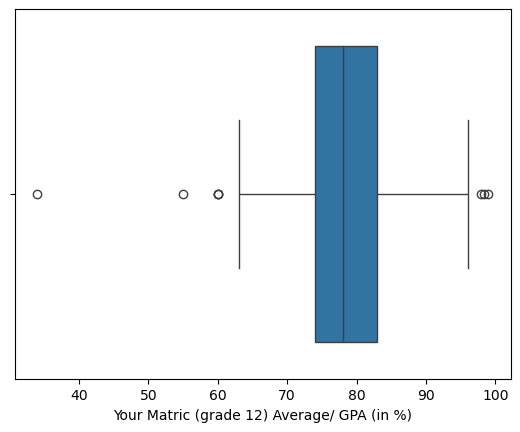

In [109]:
import seaborn as sbn

sbn.boxplot(nan_rows_removed["Your Matric (grade 12) Average/ GPA (in %)"], orient='h')

In [110]:
Q1 = nan_rows_removed["Your Matric (grade 12) Average/ GPA (in %)"].quantile(0.25)
#Q2 = nan_rows_removed["Your Matric (grade 12) Average/ GPA (in %)"].quantile(0.50)
Q3 = nan_rows_removed["Your Matric (grade 12) Average/ GPA (in %)"].quantile(0.75)

IQR = Q3-Q1

Lower_Fence = Q1 - (1.5*IQR)
Upper_Fence = Q3 + (1.5*IQR)

outliers_condition = (nan_rows_removed["Your Matric (grade 12) Average/ GPA (in %)"] < Lower_Fence) | (nan_rows_removed["Your Matric (grade 12) Average/ GPA (in %)"] > Upper_Fence)
outliers = nan_rows_removed[(outliers_condition)]
number_of_outliers = outliers.shape[0]
print(number_of_outliers)
outliers

8


,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
38,2024/03/07 5:20:31 pm EET,Male,99.00,2nd Year,Economic & Management Sciences,90.00,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,Only weekends,3-5,3,4+,No,Yes,Very close
54,2024/03/07 5:25:13 pm EET,Male,98.00,1st Year,Engineering,89.00,Private accommodation/ stay with family/friends,R 4001- R 5000,"Yes (NSFAS, etc...)",1-3,Only weekends,8+,0,4+,Yes,No,Distant
73,2024/03/07 5:39:33 pm EET,Female,98.33,2nd Year,Economic & Management Sciences,95.22,Non-private accommodation ie. Res,R 4001- R 5000,No,8+,1,0,0,0,No,Yes,Close
203,2024/03/07 8:56:01 pm EET,Female,60.00,1st Year,Economic & Management Sciences,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,Only weekends,0,0,1,No,No,Close
254,2024/03/07 11:19:54 pm EET,Male,34.00,NaN,Economic & Management Sciences,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,Only weekends,5-8,1,0,No,Yes,Very close
268,2024/03/07 11:31:34 pm EET,Male,60.00,1st Year,Economic & Management Sciences,75.00,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,1,5-8,0,0,Yes,Yes,Very close
335,2024/03/08 5:50:07 pm EET,Female,55.00,2nd Year,Economic & Management Sciences,61.00,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,0,0,0,4+,No,NaN,Fair
358,2024/03/11 2:06:41 pm EET,Male,60.00,2nd Year,Arts & Social Sciences,50.00,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,5-8,0,3,No,Yes,Fair


In [111]:
no_outliers_df = nan_rows_removed[~outliers_condition]

In [112]:
mean_matrice_GPA_w_outliers = nan_rows_removed["Your Matric (grade 12) Average/ GPA (in %)"].mean()
mean_matrice_GPA_w_outliers

77.98972431077695

In [113]:
mean_matrice_GPA_without_outliers = no_outliers_df["Your Matric (grade 12) Average/ GPA (in %)"].mean()
mean_matrice_GPA_without_outliers

78.14212276214833

In [114]:
# inplace=True means that new Data Frame is created. It's the nan_rows_removed that is altered
nan_rows_removed["Your Matric (grade 12) Average/ GPA (in %)"].fillna(mean_matrice_GPA_without_outliers, inplace=True)

C:\Users\acm11\AppData\Local\Temp\ipykernel_21840\236573897.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nan_rows_removed["Your Matric (grade 12) Average/ GPA (in %)"].fillna(mean_matrice_GPA_without_outliers, inplace=True)


In [115]:
nan_rows_removed.isna().sum()

Timestamp                                                                                             0
Your Sex?                                                                                             0
Your Matric (grade 12) Average/ GPA (in %)                                                            0
What year were you in last year (2023) ?                                                             71
What faculty does your degree fall under?                                                             5
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   84
Your Accommodation Status Last Year (2023)                                                           21
Monthly Allowance in 2023                                                                            29
Were you on scholarship/bursary in 2023?                                                              6
Additional amount of studying (in hrs) per week                 

##### 4.2.1.3) Deleting rows with NaN in "What faculty..." 

Reasoning: 
- I'm thinking it will be more precise to delete than to fill and it's only 5 rows

In [125]:
alcohol_clean1 = nan_rows_removed.dropna(subset=["What faculty does your degree fall under?"])
alcohol_clean1.isna().sum()

Timestamp                                                                                             0
Your Sex?                                                                                             0
Your Matric (grade 12) Average/ GPA (in %)                                                            0
What year were you in last year (2023) ?                                                             70
What faculty does your degree fall under?                                                             0
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   82
Your Accommodation Status Last Year (2023)                                                           21
Monthly Allowance in 2023                                                                            28
Were you on scholarship/bursary in 2023?                                                              6
Additional amount of studying (in hrs) per week                 

##### 4.2.1.4) Deleting rows with NaN in "Your 2023 academic..." 

Reasoning: 
1) This cleaned dataframe will be used to measure the correlation between avg GPA and partying frequency+amount of drinks
2) Removing these remose almost all the NaN values in "What year where you..."

In [128]:
alcohol_clean2 = alcohol_clean1.dropna(subset=["Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)"])
alcohol_clean2.isna().sum()

Timestamp                                                                                             0
Your Sex?                                                                                             0
Your Matric (grade 12) Average/ GPA (in %)                                                            0
What year were you in last year (2023) ?                                                              1
What faculty does your degree fall under?                                                             0
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                    0
Your Accommodation Status Last Year (2023)                                                            2
Monthly Allowance in 2023                                                                            14
Were you on scholarship/bursary in 2023?                                                              0
Additional amount of studying (in hrs) per week                 

##### 4.2.1.5) Deleting rows with NaN in "What year where you in..." 

In [132]:
alcohol_clean3 = alcohol_clean2.dropna(subset=["What year were you in last year (2023) ?"])
alcohol_clean3.isna().sum()

Timestamp                                                                                             0
Your Sex?                                                                                             0
Your Matric (grade 12) Average/ GPA (in %)                                                            0
What year were you in last year (2023) ?                                                              0
What faculty does your degree fall under?                                                             0
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                    0
Your Accommodation Status Last Year (2023)                                                            1
Monthly Allowance in 2023                                                                            14
Were you on scholarship/bursary in 2023?                                                              0
Additional amount of studying (in hrs) per week                 

##### 4.2.1.6) Deleting rows with NaN in "Your Accomodation Status..." 


In [135]:
alcohol_clean4 = alcohol_clean3.dropna(subset=["Your Accommodation Status Last Year (2023)"])
alcohol_clean4.isna().sum()

Timestamp                                                                                             0
Your Sex?                                                                                             0
Your Matric (grade 12) Average/ GPA (in %)                                                            0
What year were you in last year (2023) ?                                                              0
What faculty does your degree fall under?                                                             0
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                    0
Your Accommodation Status Last Year (2023)                                                            0
Monthly Allowance in 2023                                                                            14
Were you on scholarship/bursary in 2023?                                                              0
Additional amount of studying (in hrs) per week                 

##### 4.2.1.7) Filling 'Monthly Allowance in 2023' NaN with the most common allowance

Reasoning:
- I don't want to lose 14 rows/students from the data
- The Monthly Allowance is not that important for the research I wanna do (another solution could then be to just delete that column)
- If I want to do reseach using the monthly allowance my data probably isn't scewed that much with this way of dealing with the missed values

###### 4.1.1.7.1) Finding the mode

In [140]:
mode_of_month_allow = alcohol_clean4["Monthly Allowance in 2023"].mode()[0]
count_of_mode_of_month_allow = alcohol_clean4["Monthly Allowance in 2023"].value_counts()[mode_of_month_allow]
print(mode_of_month_allow)
print(count_of_mode_of_month_allow)

R 4001- R 5000
123


###### 4.1.1.7.2) Filling NaNs with mode 

In [143]:
alcohol_clean4["Monthly Allowance in 2023"].fillna(mode_of_month_allow, inplace=True)
alcohol_clean4.isna().sum()

C:\Users\acm11\AppData\Local\Temp\ipykernel_21840\3896794115.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  alcohol_clean4["Monthly Allowance in 2023"].fillna(mode_of_month_allow, inplace=True)
C:\Users\acm11\AppData\Local\Temp\ipykernel_21840\3896794115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcohol_clean4["Monthly Allowance

Timestamp                                                                                            0
Your Sex?                                                                                            0
Your Matric (grade 12) Average/ GPA (in %)                                                           0
What year were you in last year (2023) ?                                                             0
What faculty does your degree fall under?                                                            0
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   0
Your Accommodation Status Last Year (2023)                                                           0
Monthly Allowance in 2023                                                                            0
Were you on scholarship/bursary in 2023?                                                             0
Additional amount of studying (in hrs) per week                          

##### 4.2.1.8) Removing remaining rows with NaN

In [146]:
alcohol_clean5 = alcohol_clean4.dropna()
alcohol_clean5.isna().sum()

Timestamp                                                                                            0
Your Sex?                                                                                            0
Your Matric (grade 12) Average/ GPA (in %)                                                           0
What year were you in last year (2023) ?                                                             0
What faculty does your degree fall under?                                                            0
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   0
Your Accommodation Status Last Year (2023)                                                           0
Monthly Allowance in 2023                                                                            0
Were you on scholarship/bursary in 2023?                                                             0
Additional amount of studying (in hrs) per week                          

##### 4.2.1.9) Remaining rows after dealing with missed values:

In [149]:
alcohol_clean5.shape[0]

311

### 5) Anonymisation (NONE)

### 6) Visualization

#### 6.1) Iris data

##### 6.1.1) The mean of the features of Iris

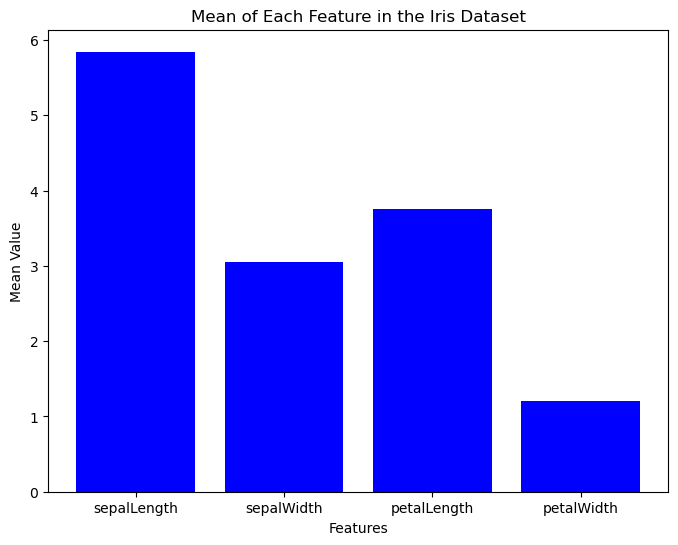

In [155]:
import matplotlib.pyplot as plt

feature_names = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']

plt.figure(figsize=(8, 6))
plt.bar(feature_names, mean_of_features, color='blue')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean of Each Feature in the Iris Dataset')
plt.show()

#### 6.2) Data about the Effect of Alcohol Use on Students Performance  

##### 6.2.2) Bar chart: Matric Average GPA (in %) grouped by sex (outliers included)

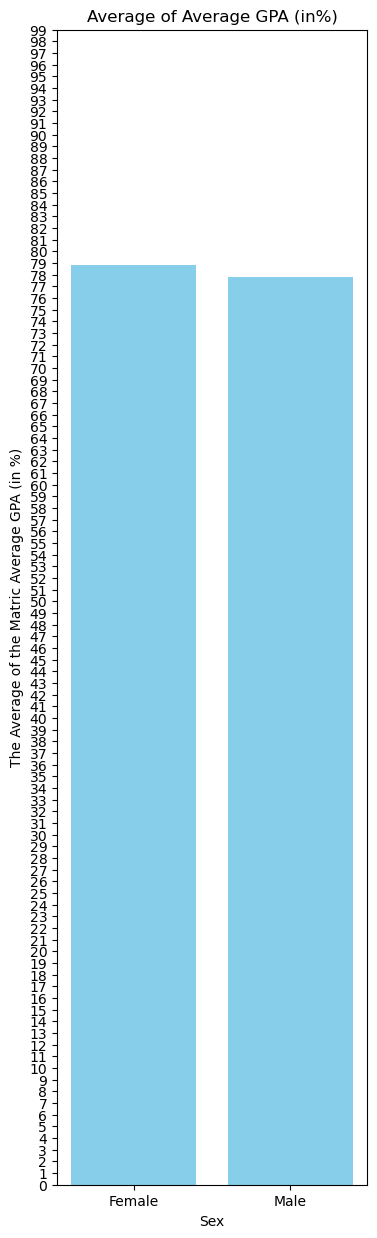

In [159]:


plt.figure(figsize=(4, 15))

average_gpa = alcohol_clean5.groupby('Your Sex?')['Your Matric (grade 12) Average/ GPA (in %)'].mean()

plt.bar(average_gpa.index, average_gpa.values, color='skyblue')
plt.xlabel('Sex')
plt.ylabel('The Average of the Matric Average GPA (in %)')
plt.title('Average of Average GPA (in%)')
plt.yticks(range(0, 100, 1)) 
plt.show()


##### 6.2.3) Distribution of how many classes the students has missed

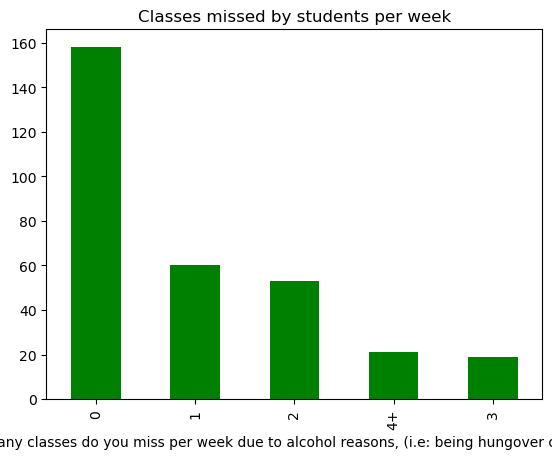

In [161]:
alcohol_clean5['How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)'].value_counts().plot(kind='bar', color="green")
plt.title('Classes missed by students per week')
plt.show()

##### 6.2.4) Pie chart of parents approval of alcohol consumption grouped by gender

In [165]:
gender = alcohol_clean5.groupby(['Do your parents approve alcohol consumption?', 'Your Sex?'])['Your Sex?'].count()

gender

Do your parents approve alcohol consumption?  Your Sex?
No                                            Female        18
                                              Male          22
Yes                                           Female       125
                                              Male         146
Name: Your Sex?, dtype: int64

Text(0, 0.5, '')

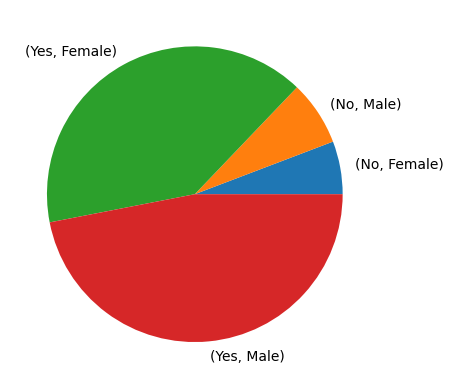

In [167]:
gender.plot.pie()
plt.ylabel('')

##### 6.2.5) Distribution of 2023 Average GPA (in%)

In [170]:
alcohol_clean5["Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)"].describe()

count    311.000000
mean      66.475595
std        9.159866
min       30.000000
25%       60.000000
50%       65.000000
75%       73.000000
max       95.220000
Name: Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student), dtype: float64

In [172]:
ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

avg_GPA = alcohol_clean5.groupby([(pd.cut(alcohol_clean5["Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)"], ranges))])["Your Sex?"].count()
avg_GPA

C:\Users\acm11\AppData\Local\Temp\ipykernel_21840\752941656.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_GPA = alcohol_clean5.groupby([(pd.cut(alcohol_clean5["Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)"], ranges))])["Your Sex?"].count()


Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)
(0, 10]        0
(10, 20]       0
(20, 30]       1
(30, 40]       0
(40, 50]       6
(50, 60]      88
(60, 70]     116
(70, 80]      83
(80, 90]      15
(90, 100]      2
Name: Your Sex?, dtype: int64

Text(0, 0.5, 'Number of Students')

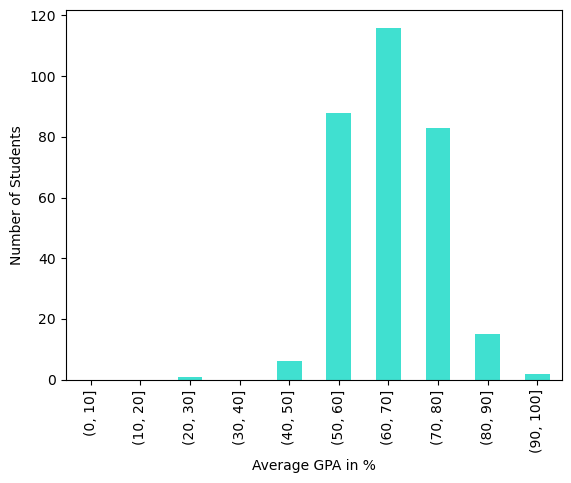

In [174]:
avg_GPA.plot(kind="bar", color="turquoise")
plt.xlabel("Average GPA in %")
plt.ylabel("Number of Students")

Text(0, 0.5, 'Number of Students')

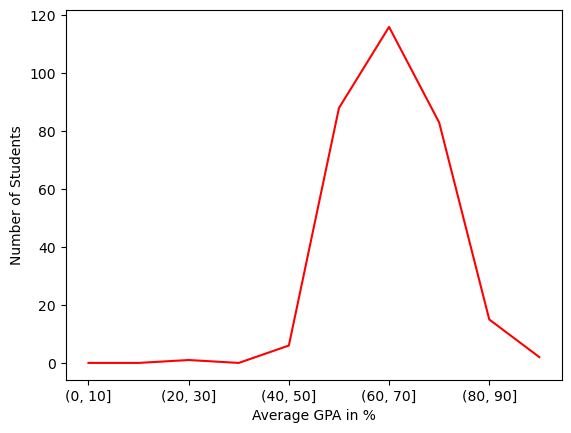

In [176]:
avg_GPA.plot(kind="line", color="red")
plt.xlabel("Average GPA in %")
plt.ylabel("Number of Students")